# 4.10: Coding Etiquette & Excel Reporting - Part C

This Script is a continuation from Part B. 
### This notebook contains:
    01. Importing Libraries
    02. Importing Data
    03. Coding Etiquette & Excel Reporting
        F. Visualizations - Customer Profiling
        G. Aggregations Customer Profiles
        H. Cross Examination: Customer Profiles to Regions & Departments
        I. Visualizations: Cross Examinations

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
# turning project folder path into string
path = r'/Users/lisa/DA Projects/12-2022 Instacart Basket Analysis'

In [3]:
# Importing latest dataset with normal activity customers
df_opan = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_profiled.pkl'))

In [4]:
df_opan.head(2)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,no_of_dependants,marital_status,income,_merge,region,age_group_flag,income_flag,household_size_flag,child_age_flag,pets_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,3,married,40423,both,South,Middle-Aged adult,Low middle income,Large household,Older children,No Pets
1,2398795,1,2,3,7,15.0,False,196,1,1,...,3,married,40423,both,South,Middle-Aged adult,Low middle income,Large household,Older children,No Pets


In [5]:
# Importing department
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [6]:
#check
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [7]:
# Renaming Unnamed: 0 to department_id
df_dep.rename(columns ={'Unnamed: 0': 'department_id'}, inplace = True)

In [8]:
#check
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## 03. Coding Etiquette & Excel Reporting

### F. Visualizations - Customer Profiling

#### Question 6.
Create an appropriate visualization to show the distribution of profiles.

In [10]:
# getting variable names
df_opan.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'order_freq', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependants', 'marital_status', 'income', '_merge', 'region',
       'age_group_flag', 'income_flag', 'household_size_flag',
       'child_age_flag', 'pets_flag'],
      dtype='object')

#### Age Group

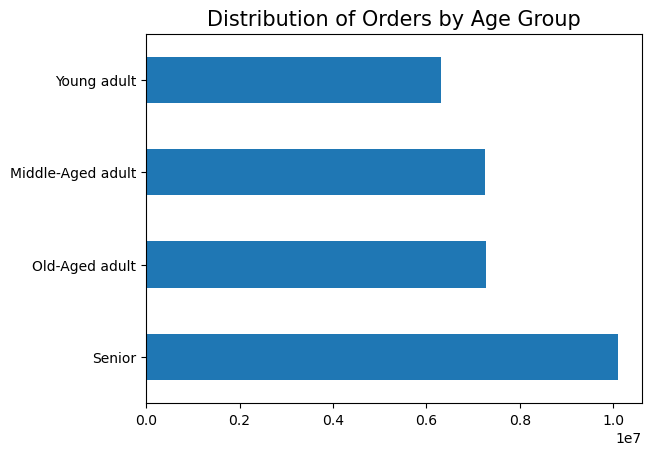

In [14]:
# creating bar chart for age group
bar_age_group = df_opan['age_group_flag'].value_counts().plot.barh()
plt.ylabel('')
plt.title('Distribution of Orders by Age Group',fontsize=15)
plt.savefig('bar_distrib_by_age.png', bbox_inches='tight')

#### Income

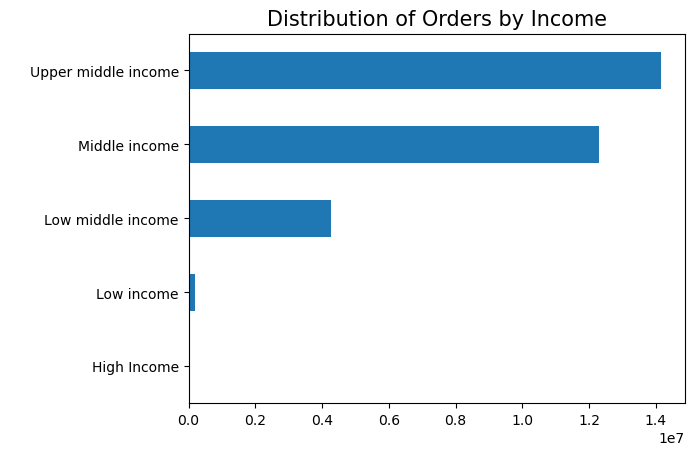

In [16]:
# creating bar chart for income
bar_income = df_opan['income_flag'].value_counts().sort_index().plot.barh()
plt.ylabel(' ')
plt.title('Distribution of Orders by Income',fontsize=15)
plt.savefig('bar_distrib_by_income_flag.png', bbox_inches='tight')

#### Household Size

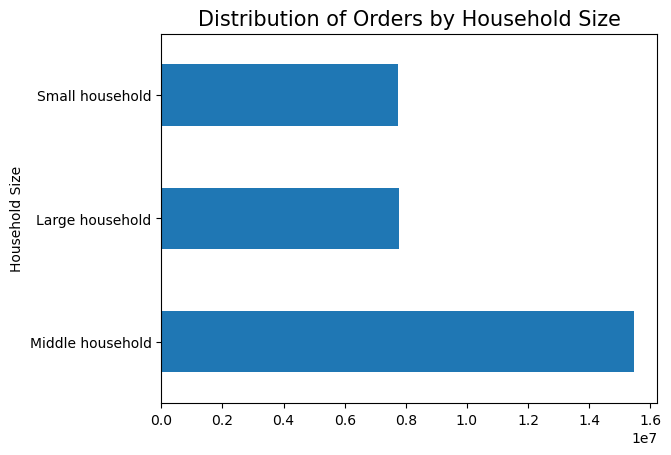

In [19]:
# creating bar chart for Household Size
bar_household_size = df_opan['household_size_flag'].value_counts().plot.barh()
plt.ylabel('Household Size')
plt.title('Distribution of Orders by Household Size',fontsize=15)
plt.savefig('bar_distrib_by_household_size.png', bbox_inches='tight')

#### Child Age

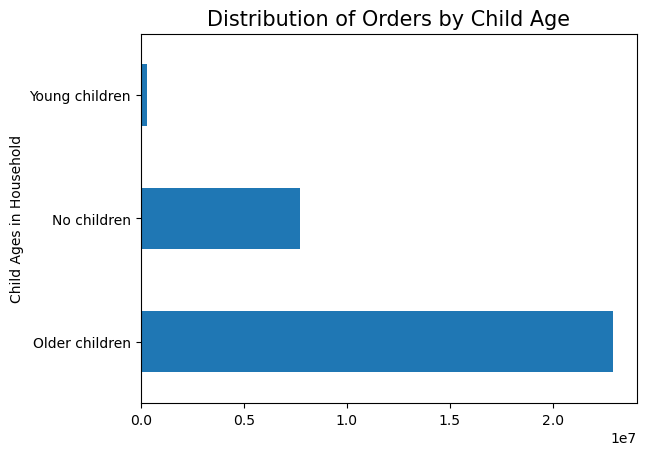

In [21]:
# creating bar chart for age group
bar_child_age = df_opan['child_age_flag'].value_counts().plot.barh()
plt.ylabel('Child Ages in Household')
plt.title('Distribution of Orders by Child Age',fontsize=15)
plt.savefig('bar_distrib_by_child_age.png', bbox_inches='tight')

#### Pets

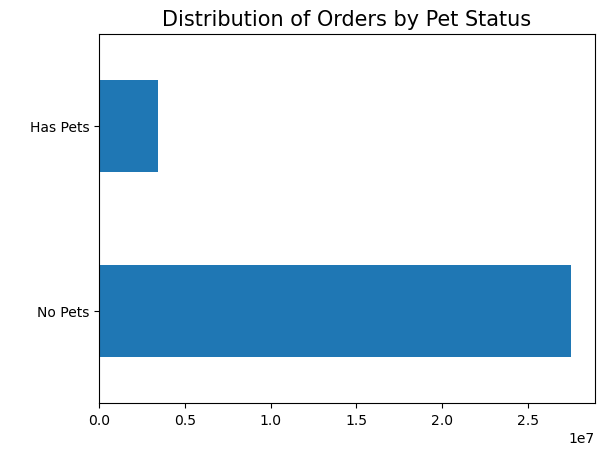

In [23]:
# creating bar chart for pet status
bar_pets = df_opan['pets_flag'].value_counts().plot.barh()
plt.ylabel(' ')
plt.title('Distribution of Orders by Pet Status',fontsize=15)
plt.savefig('bar_distrib_by_pet_status.png', bbox_inches='tight')

### G. Aggregations Customer Profiles

#### Question 7.
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [24]:
# overview
df_opan.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'order_freq', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependants', 'marital_status', 'income', '_merge', 'region',
       'age_group_flag', 'income_flag', 'household_size_flag',
       'child_age_flag', 'pets_flag'],
      dtype='object')

#### Age Group

In [25]:
# usage frequency per age group
df_opan.groupby('age_group_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                    mean  min   max
age_group_flag                                     
Middle-Aged adult              10.788131  0.0  30.0
Old-Aged adult                 10.833339  0.0  30.0
Senior                         10.791879  0.0  30.0
Young adult                    10.838774  0.0  30.0

In [26]:
# aggregate prices
df_opan.groupby('age_group_flag').agg({'prices':['mean', 'min','max']})

prices           
                       mean  min   max
age_group_flag                        
Middle-Aged adult  7.793286  1.0  25.0
Old-Aged adult     7.788148  1.0  25.0
Senior             7.796144  1.0  25.0
Young adult        7.781398  1.0  25.0

#### Income

In [27]:
# usage frequency per age group
df_opan.groupby('income_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                      mean  min   max
income_flag                                          
High Income                      10.458571  0.0  30.0
Low income                       11.592277  0.0  30.0
Low middle income                11.111454  0.0  30.0
Middle income                    10.741217  0.0  30.0
Upper middle income              10.770904  0.0  30.0

In [28]:
# aggregate prices
df_opan.groupby('income_flag').agg({'prices':['mean', 'min','max']})

prices           
                         mean  min   max
income_flag                             
High Income          7.761387  1.0  25.0
Low income           6.532603  1.0  25.0
Low middle income    6.933124  1.0  25.0
Middle income        7.919204  1.0  25.0
Upper middle income  7.954215  1.0  25.0

#### Household Size

In [29]:
# usage frequency per age group
df_opan.groupby('household_size_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                      mean  min   max
household_size_flag                                  
Large household                  10.816223  0.0  30.0
Middle household                 10.816513  0.0  30.0
Small household                  10.791951  0.0  30.0

In [30]:
# aggregate prices
df_opan.groupby('household_size_flag').agg({'prices':['mean', 'min','max']})

prices           
                         mean  min   max
household_size_flag                     
Large household      7.792886  1.0  25.0
Middle household     7.789957  1.0  25.0
Small household      7.789550  1.0  25.0

#### Child Age

In [31]:
# usage frequency per age group
df_opan.groupby('child_age_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                 mean  min   max
child_age_flag                                  
No children                 10.791951  0.0  30.0
Older children              10.831001  0.0  30.0
Young children               9.737722  0.0  30.0

In [32]:
# aggregate prices
df_opan.groupby('child_age_flag').agg({'prices':['mean', 'min','max']})

prices           
                    mean  min   max
child_age_flag                     
No children     7.789550  1.0  25.0
Older children  7.792857  1.0  25.0
Young children  7.647681  1.0  15.0

#### Pet Status

In [33]:
# usage frequency per pet status
df_opan.groupby('pets_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                            mean  min   max
pets_flag                                  
Has Pets               10.182021  0.0  30.0
No Pets                10.889796  0.0  30.0

In [34]:
# aggregate prices pet status
df_opan.groupby('pets_flag').agg({'prices':['mean', 'min','max']})

prices           
               mean  min   max
pets_flag                     
Has Pets   7.811730  1.0  25.0
No Pets    7.787939  1.0  25.0

### H. Cross Examination: Customer Profiles to Regions & Departments

#### Question 8.
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

#### Age Group

In [35]:
# creating crosstab for age and region
age_reg =pd.crosstab(df_opan['age_group_flag'], df_opan['region'])

In [36]:
# check
age_reg

region,Midwest,Northeast,South,West
age_group_flag,,,,
Middle-Aged adult,1723183,1261452,2449358,1828824
Old-Aged adult,1720513,1282744,2373650,1907993
Senior,2356770,1809013,3361229,2585595
Young adult,1461047,1111476,2126902,1604815


In [37]:
# Export to clipboard
age_reg.to_clipboard()

In [38]:
# creating crosstab for age and department
age_dep =pd.crosstab(df_opan['age_group_flag'], df_opan['department_id'])

In [39]:
# check
age_dep

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
age_group_flag,,,,,,,,,,,,,,,,,,,,,
Middle-Aged adult,493299,7866,264380,2136228,34234,60311,596744,21490,191499,7767,...,157423,417211,157252,236040,1221535,164183,97463,647752,236420,14876
Old-Aged adult,499745,8048,262836,2133423,34330,60379,611229,21405,193877,7795,...,158025,421687,158424,238305,1211427,163879,95840,652604,234694,15510
Senior,697366,11087,366017,2966397,45628,82578,844687,30570,267652,10929,...,222435,581946,217539,329485,1687944,229979,133019,900333,328967,20703
Young adult,431321,7410,227595,1843225,30435,52723,519241,19595,169108,6960,...,136898,361861,137635,208244,1056276,141816,84070,565717,203753,13679


In [40]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [41]:
# Export to clipboard
age_dep.to_clipboard()

#### Income

In [42]:
# creating crosstab for income and region
income_reg =pd.crosstab(df_opan['income_flag'], df_opan['region'])

In [43]:
# check
income_reg

region,Midwest,Northeast,South,West
income_flag,,,,
High Income,19051,9543,14613,14575
Low income,53250,33075,65037,42508
Low middle income,972158,756404,1444146,1085810
Middle income,2836012,2158722,4138011,3172029
Upper middle income,3381042,2506941,4649332,3612305


In [44]:
# Export to clipboard
income_reg.to_clipboard()

In [45]:
# creating crosstab for income and department
income_dep =pd.crosstab(df_opan['income_flag'], df_opan['department_id'])

In [46]:
# check
income_dep

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
income_flag,,,,,,,,,,,,,,,,,,,,,
High Income,4096,97,2572,11762,1815,512,5487,473,1739,4,...,1384,3609,1317,2146,9761,2818,450,5260,1544,59
Low income,12769,288,6001,46021,1247,1375,23377,448,3938,333,...,1565,8716,4801,4190,28367,4726,1509,34849,6501,395
Low middle income,275199,4670,138085,1093531,20952,28865,456365,11334,88463,5641,...,53152,217505,111739,108755,652449,106782,41929,638904,135257,8507
Middle income,845263,13703,449031,3702719,53286,105760,965697,36189,337004,13259,...,284512,716520,256714,413876,2090155,268390,170250,988052,399977,26411
Upper middle income,984404,15653,525139,4225240,67327,119479,1120975,44616,390992,14214,...,334168,836355,296279,483107,2396450,317141,196254,1099341,460555,29396


In [47]:
# Export to clipboard
income_dep.to_clipboard()

#### Household Size

In [48]:
# creating crosstab for household size and region
house_size_reg =pd.crosstab(df_opan['household_size_flag'], df_opan['region'])

In [49]:
# check
house_size_reg

region,Midwest,Northeast,South,West
household_size_flag,,,,
Large household,1787286,1381233,2585864,2018133
Middle household,3651411,2728970,5143342,3928644
Small household,1822816,1354482,2581933,1980450


In [50]:
# Export to clipboard
house_size_reg.to_clipboard()

In [51]:
# creating crosstab for household size and department
house_size_dep =pd.crosstab(df_opan['household_size_flag'], df_opan['department_id'])

In [52]:
# check
house_size_dep

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
household_size_flag,,,,,,,,,,,,,,,,,,,,,
Large household,532408,8377,279822,2287719,37333,63473,640927,23142,208412,8403,...,171423,446156,167322,255325,1296264,176284,102585,691799,252592,16435
Middle household,1059975,17320,559611,4516113,70467,128057,1285633,46316,409428,17048,...,337480,892645,337096,505729,2586542,352215,204479,1384169,497860,32398
Small household,529348,8714,281395,2275441,36827,64461,645341,23602,204296,8000,...,165878,443904,166432,251020,1294376,171358,103328,690438,253382,15935


In [53]:
# Export to clipboard
house_size_dep.to_clipboard()

In [54]:
# creating crosstab for pets status and region
pets_reg =pd.crosstab(df_opan['pets_flag'], df_opan['region'])

In [55]:
# check
pets_reg

region,Midwest,Northeast,South,West
pets_flag,,,,
Has Pets,827521,598184,1117650,907996
No Pets,6433992,4866501,9193489,7019231


In [56]:
# Export to clipboard
pets_reg.to_clipboard()

In [57]:
# creating crosstab for pets status and department
pets_dep =pd.crosstab(df_opan['pets_flag'], df_opan['department_id'])

In [58]:
# check
pets_dep

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
pets_flag,,,,,,,,,,,,,,,,,,,,,
Has Pets,279796,5193,137755,769614,26552,30917,319352,93060,100234,2120,...,79553,215838,74122,125866,524135,133920,35567,305181,109529,7387
No Pets,1841935,29218,983073,8309659,118075,225074,2252549,0,721902,31331,...,595228,1566867,596728,886208,4653047,565937,374825,2461225,894305,57381


In [59]:
# Export to clipboard
house_size_dep.to_clipboard()

#### Child Age

In [60]:
# creating crosstab for child age and region
child_age_reg =pd.crosstab(df_opan['child_age_flag'], df_opan['region'])

In [61]:
# check
child_age_reg

region,Midwest,Northeast,South,West
child_age_flag,,,,
No children,1822816,1354482,2581933,1980450
Older children,5367664,4055516,7624975,5869664
Young children,71033,54687,104231,77113


In [62]:
# Export to clipboard
child_age_reg.to_clipboard()

In [63]:
# creating crosstab for child age and department
child_age_dep =pd.crosstab(df_opan['child_age_flag'], df_opan['department_id'])

In [64]:
# check
child_age_dep

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
child_age_flag,,,,,,,,,,,,,,,,,,,,,
No children,529348,8714,281395,2275441,36827,64461,645341,23602,204296,8000,...,165878,443904,166432,251020,1294376,171358,103328,690438,253382,15935
Older children,1592383,25697,839433,6803832,107800,191530,1926560,69458,617840,25451,...,508903,1338801,504418,761054,3882806,528499,0,2075968,750452,48833
Young children,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,307064,0,0,0


In [65]:
# Export to clipboard
child_age_dep.to_clipboard()

#### Pet Status

In [66]:
# creating crosstab for pets status and region
pets_reg =pd.crosstab(df_opan['pets_flag'], df_opan['region'])

In [67]:
# check
pets_reg

region,Midwest,Northeast,South,West
pets_flag,,,,
Has Pets,827521,598184,1117650,907996
No Pets,6433992,4866501,9193489,7019231


In [68]:
# Export to clipboard
pets_reg.to_clipboard()

In [69]:
# creating crosstab for pets status and department
pets_dep =pd.crosstab(df_opan['pets_flag'], df_opan['department_id'])

In [70]:
# check
pets_dep

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
pets_flag,,,,,,,,,,,,,,,,,,,,,
Has Pets,279796,5193,137755,769614,26552,30917,319352,93060,100234,2120,...,79553,215838,74122,125866,524135,133920,35567,305181,109529,7387
No Pets,1841935,29218,983073,8309659,118075,225074,2252549,0,721902,31331,...,595228,1566867,596728,886208,4653047,565937,374825,2461225,894305,57381


In [71]:
# Export to clipboard
pets_dep.to_clipboard()

### I. Visualizations: Cross Examinations 

#### Question 9.
Produce suitable charts to illustrate your results and export them in your project folder.

In [73]:
# getting overview over variables
df_opan.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'order_freq', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependants', 'marital_status', 'income', '_merge', 'region',
       'age_group_flag', 'income_flag', 'household_size_flag',
       'child_age_flag', 'pets_flag'],
      dtype='object')

### Age Groups 

#### Spending Flag  & Age Groups

In [74]:
# creating crosstab for spending flag and age group
age_spending = pd.crosstab(df_opan['age_group_flag'], df_opan['spending_flag'])

In [75]:
age_spending

spending_flag,High Spender,Low spender
age_group_flag,,
Middle-Aged adult,146620,7116197
Old-Aged adult,142389,7142511
Senior,199472,9913135
Young adult,114944,6189296


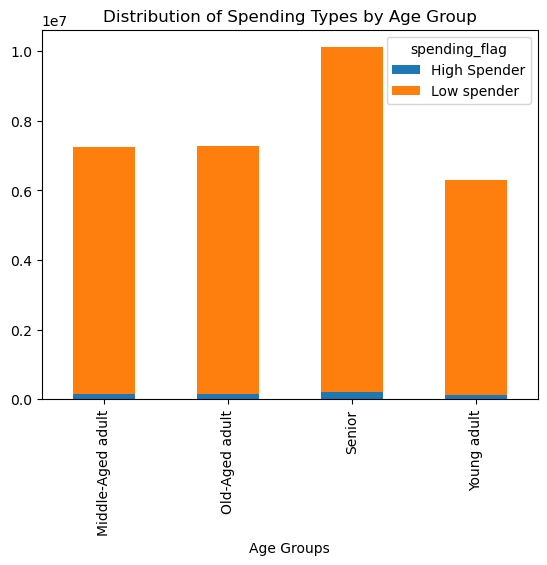

In [77]:
# create bar chart for spending flag and age group
bar_age_spending = age_spending.plot(kind= 'bar', stacked = True)
plt.title('Distribution of Spending Types by Age Group')
plt.xlabel('Age Groups')
plt.savefig('bar_age_spending.png', bbox_inches='tight')

#### Order Frequency & Age Groups

In [78]:
# creating crosstab for frequency flag and age group
age_frequency = pd.crosstab(df_opan['age_group_flag'], df_opan['frequency_flag'])

In [79]:
age_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group_flag,,,
Middle-Aged adult,4978785,669513,1614519
Old-Aged adult,4966368,694275,1624257
Senior,6941627,942929,2228051
Young adult,4317696,588258,1398286


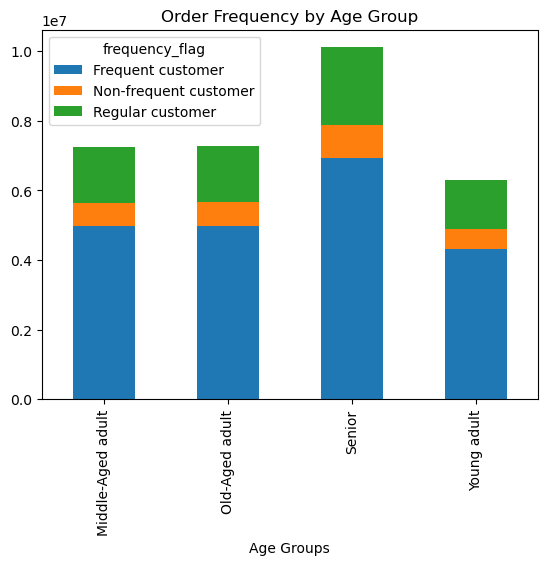

In [80]:
# create bar chart for frequency flag and age group
bar_age_frequency = age_frequency.plot(kind= 'bar', stacked = True)
plt.title('Order Frequency by Age Group')
plt.xlabel('Age Groups')
plt.savefig('bar_age_frequency.png', bbox_inches='tight')

#### Region & Age Groups

In [82]:
# creating crosstab for age and region
age_reg2 = pd.crosstab(df_opan['region'], df_opan['age_group_flag'])

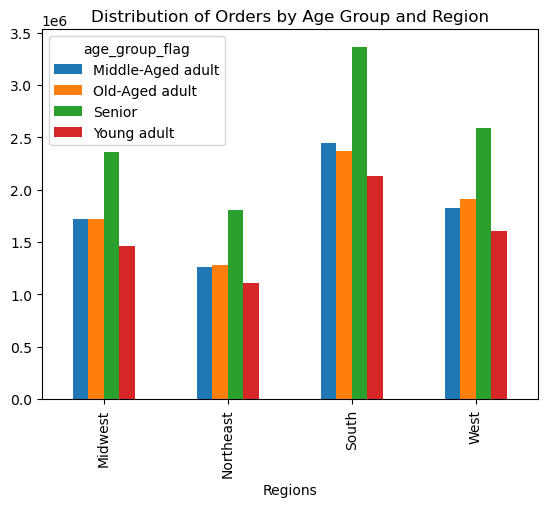

In [83]:
# create bar chart Age and Region
bar_age_region = age_reg2.plot(kind= 'bar', stacked = False)
plt.title('Distribution of Orders by Age Group and Region')
plt.xlabel('Regions')
plt.savefig('bar_age_region.png', bbox_inches='tight')

### Income

#### Spending Flag & Income Type

In [84]:
# creating crosstab for spending flag and income
income_spending = pd.crosstab(df_opan['income_flag'], df_opan['spending_flag'])

In [94]:
income_spending

spending_flag,High Spender,Low spender
income_flag,,
High Income,57782,0
Low income,0,193870
Low middle income,5121,4253397
Middle income,74449,12230325
Upper middle income,466073,13683547


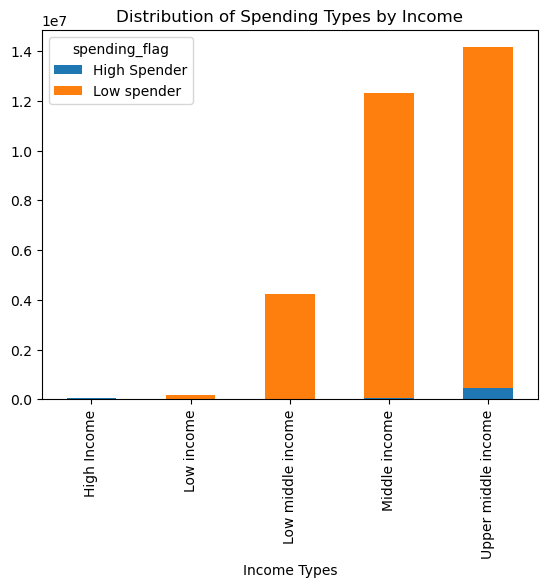

In [86]:
# create bar chart Income and Spending
bar_income_spending = income_spending.plot(kind= 'bar', stacked = True)
plt.title('Distribution of Spending Types by Income')
plt.xlabel('Income Types')
plt.savefig('bar_income_spending.png', bbox_inches='tight')

#### Order Frequency & Income Type

In [87]:
# creating crosstab for order frequency and income
income_freq = pd.crosstab(df_opan['income_flag'], df_opan['frequency_flag'])

In [88]:
income_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_flag,,,
High Income,39685,4347,13750
Low income,122153,23611,48106
Low middle income,2819069,464659,974790
Middle income,8483557,1116203,2705014
Upper middle income,9740012,1286155,3123453


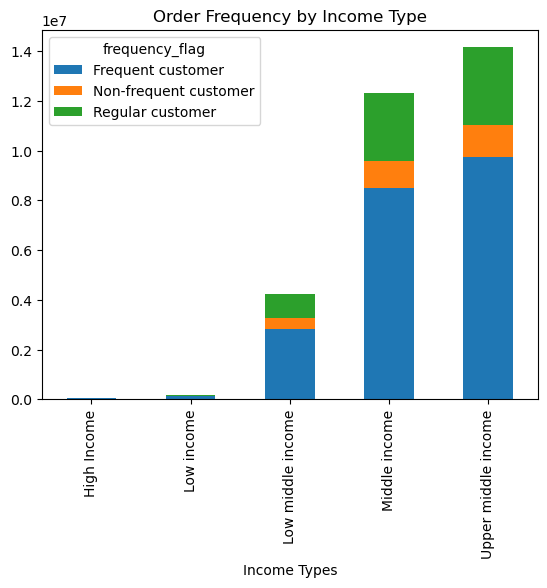

In [89]:
# create bar chart for frequency flag and income
bar_income_freq = income_freq.plot(kind= 'bar', stacked = True)
plt.title('Order Frequency by Income Type')
plt.xlabel('Income Types')
plt.savefig('bar_income_frequency.png', bbox_inches='tight')

#### Region & Income Type

In [90]:
# create crosstab region and income
income_reg2 =pd.crosstab(df_opan['region'], df_opan['income_flag'])

In [91]:
income_reg2

income_flag,High Income,Low income,Low middle income,Middle income,Upper middle income
region,,,,,
Midwest,19051,53250,972158,2836012,3381042
Northeast,9543,33075,756404,2158722,2506941
South,14613,65037,1444146,4138011,4649332
West,14575,42508,1085810,3172029,3612305


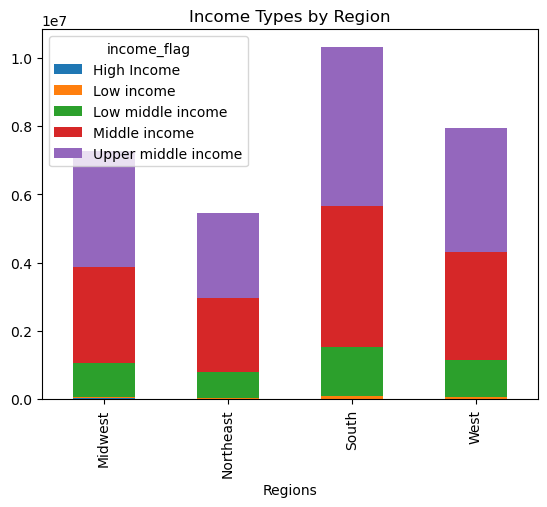

In [92]:
# create bar chart for region and income
bar_income_region = income_reg2.plot(kind= 'bar', stacked = True)
plt.title('Income Types by Region')
plt.xlabel('Regions')
plt.savefig('bar_income_region.png', bbox_inches='tight')

### Household Size

#### Spending Flag & Household Size

In [92]:
# creating crosstab for spending flag and household size
household_spending = pd.crosstab(df_opan['household_size_flag'], df_opan['spending_flag'])

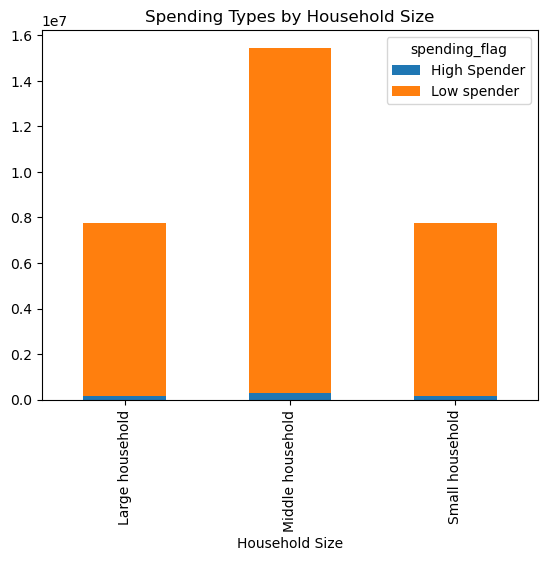

In [95]:
# create bar chart Household Size and Spending
bar_household_spending = household_spending.plot(kind= 'bar', stacked = True)
plt.title('Spending Types by Household Size')
plt.xlabel('Household Size')
plt.savefig('bar_household_size_spending.png', bbox_inches='tight')

#### Order Frequency & Household Size

In [96]:
# creating crosstab for order frequency and houesehold size
household_freq = pd.crosstab(df_opan['household_size_flag'], df_opan['frequency_flag'])

In [97]:
household_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
household_size_flag,,,
Large household,5317843,723881,1730792
Middle household,10601496,1454588,3396283
Small household,5285137,716506,1738038


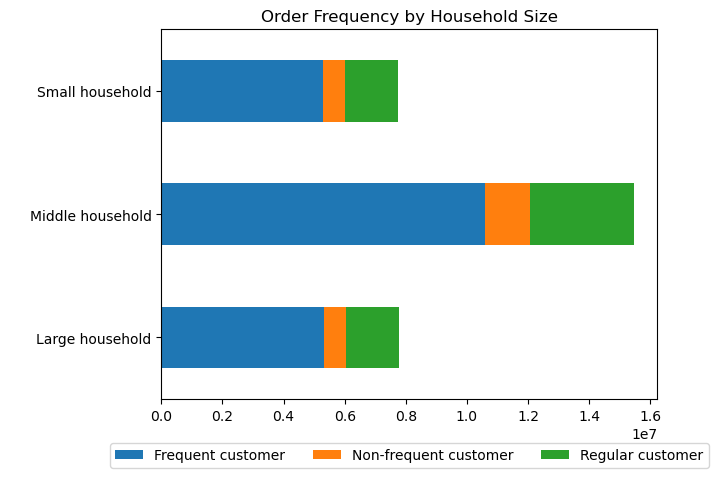

In [113]:
# create bar chart Household Size and Spending
bar_household_freq = household_freq.plot(kind= 'barh', stacked = True)
plt.title('Order Frequency by Household Size')
plt.ylabel(' ')
bar_household_freq.legend(loc='upper center',  bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.savefig('bar_household_size_frequency.png', bbox_inches='tight')

#### Region & Household Size

In [114]:
# create crosstab region and income
household_reg2 =pd.crosstab(df_opan['region'], df_opan['household_size_flag'])

In [115]:
household_reg2

household_size_flag,Large household,Middle household,Small household
region,,,
Midwest,1787286,3651411,1822816
Northeast,1381233,2728970,1354482
South,2585864,5143342,2581933
West,2018133,3928644,1980450


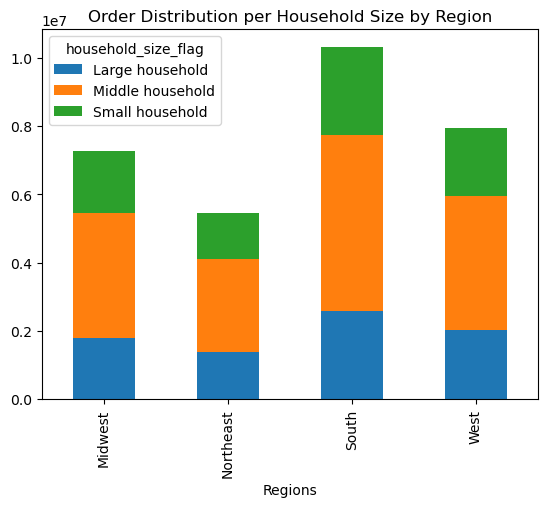

In [116]:
# create bar chart for region and household size
bar_household_region = household_reg2.plot(kind= 'bar', stacked = True)
plt.title('Order Distribution per Household Size by Region')
plt.xlabel('Regions')
plt.savefig('bar_household_size_region.png', bbox_inches='tight')